In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#adding comment for git commit

Guiding Questions: 
- What kind of network can we construct from the sample data? Weighted / Unweighted?

Focusing on Gender, HR data first 

In [3]:
gender = pd.read_csv("../data/gender_anonymized.csv")
manager_history = pd.read_csv("../data/Managers History - 2020_03_11_anonymized.csv")

#Info regarding each team's composition (list of all members within that team)
Team_Members = pd.read_csv("../data/Team History Report - 2020_03_11_anonymized.csv")
#Info regarding team itself (name, start date, end date, lead id)
Team_Info = pd.read_csv("../data/Team Report - 2020_03_11_anonymized.csv")
manager_history.head(3)

,Employee id,Employee external id,Employee email,Start,End,Manager id,Manager external id,Manager email
0,6,NaN,659217,2015-08-12 00:00:00+00:00,2017-05-21 01:00:19.499305+00:00,18,NaN,896650
1,6,NaN,659217,2017-05-03 14:13:31.273366+00:00,2017-05-05 01:00:12.121456+00:00,56,1015,183338
2,6,NaN,659217,2017-05-05 01:00:12.121756+00:00,2017-05-05 01:00:12.123725+00:00,117,000137,209720


In [4]:
#Option 1: visualizng employee & manager relationship
#only subsetting the first one because or else the graph is too densed (5812 input)
employee_manager = manager_history[['Employee email', 'Manager email']]

emp_man_gender = pd.merge(employee_manager, gender, left_on="Employee email", right_on='fake_id').drop(columns=['fake_id']).rename(columns={'gender':'Employee Gender'})
emp_man_gender = pd.merge(emp_man_gender, gender, left_on="Manager email", right_on='fake_id').drop(columns=['fake_id']).rename(columns={'gender':'Manager Gender'})
emp_man_gender.tail()

,Employee email,Manager email,Employee Gender,Manager Gender
2670,344752,702527,F,M
2671,47531,703652,F,M
2672,886758,703652,F,M
2673,179905,247035,M,M
2674,192717,727752,M,F


In [5]:
#employee_manager.head(3) [children, parent]
#putting edge list into directed graph object
#adding employee gender & manager as node attribute

#should it be from employee or from manager since it's a more hierarchy structure? 
G_all = nx.Graph()
G_all = nx.from_pandas_edgelist(emp_man_gender,
                                'Employee email', 
                                'Manager email',
                                create_using=nx.DiGraph(),
                                edge_attr=True)

print(G_all[344752][702527])


{'Employee Gender': 'F', 'Manager Gender': 'M'}


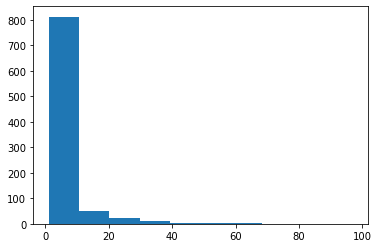

In [6]:
# (in- plus out-)degree 
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G_all)

Text(0, 0.5, 'Frequency')

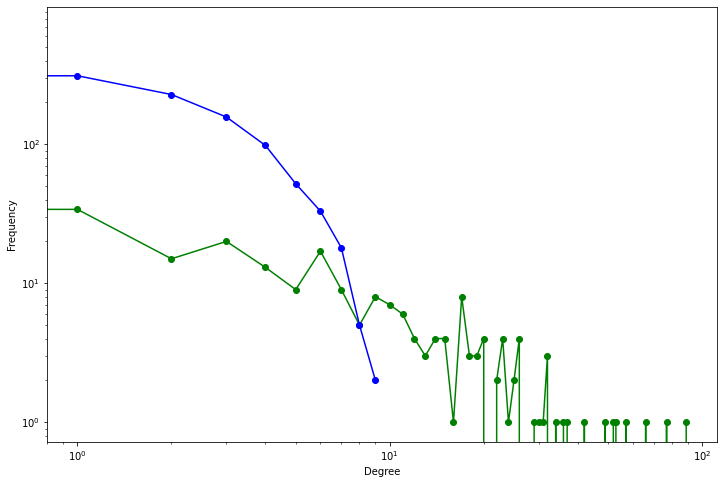

In [7]:
#Source: https://stackoverflow.com/questions/53958700/plotting-the-degree-distribution-of-a-graph-using-nx-degree-histogram
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq


in_degree_freq = degree_histogram_directed(G_all, in_degree=True)
out_degree_freq = degree_histogram_directed(G_all, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [8]:
leaderboard = {}
for x in G_all.nodes:
    leaderboard[x] = len(G_all[x])
leader_df = pd.Series(leaderboard, name = 'connections').to_frame().sort_values('connections', ascending=False)
leader_df.head()

,connections
81616,9
104049,9
905451,8
831076,8
425123,8


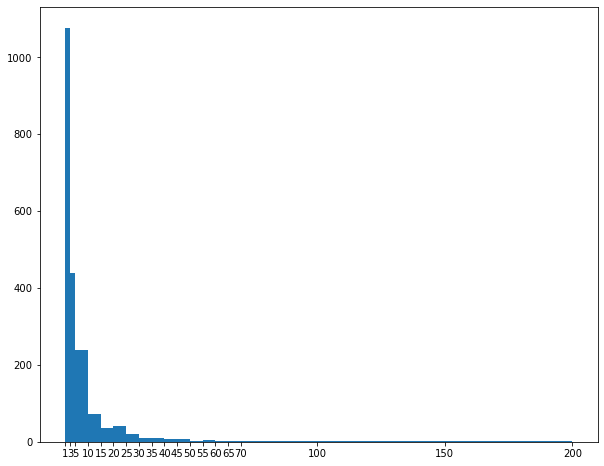

In [39]:
plt.figure(figsize= (10, 8))
n, bins, patches = plt.hist([v for k, v in nx.degree(G_all)], bins = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100, 150, 200])
plt.xticks(bins)
plt.show()

Text(0.5, 1.0, 'Eigenvector')

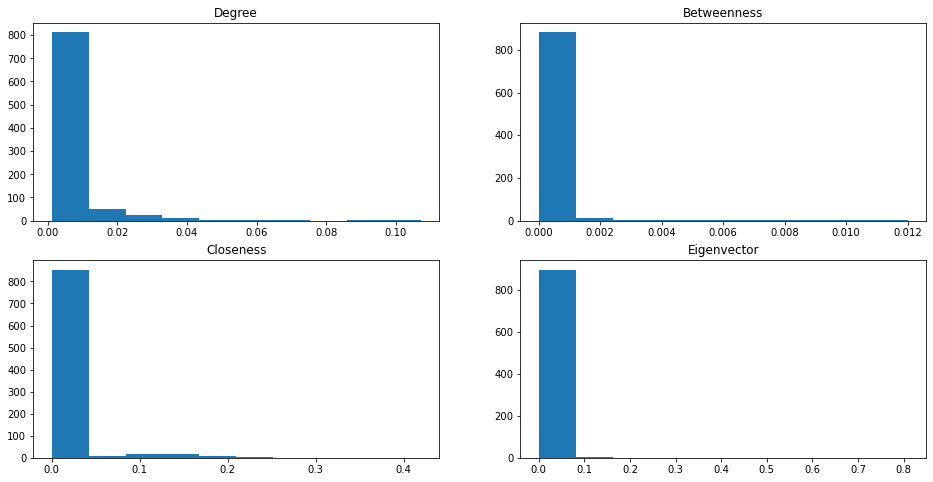

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8))

axs[0, 0].hist(nx.centrality.degree_centrality(G_all).values())
axs[0, 0].set_title('Degree')

axs[0, 1].hist(nx.centrality.betweenness_centrality(G_all).values())
axs[0, 1].set_title('Betweenness')

axs[1, 0].hist(nx.centrality.closeness_centrality(G_all).values())
axs[1, 0].set_title('Closeness')

axs[1, 1].hist(nx.centrality.eigenvector_centrality(G_all).values())
axs[1, 1].set_title('Eigenvector')

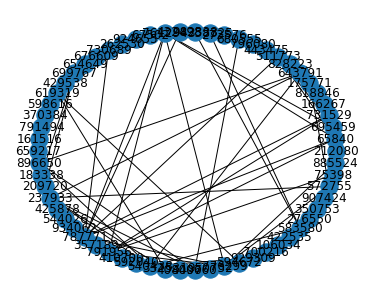

In [24]:
G_100 = nx.Graph()
G_100 = nx.from_pandas_edgelist(employee_manager_100, 'Employee email', 'Manager email')

#plotting the 100 subset
plt.figure(figsize=(5, 4))
nx.draw_shell(G_100, with_labels = True)

In [ ]:
#Option 2: Anyway to visualizing timeframe (how long are people manage by the same person on average?)